<a href="https://colab.research.google.com/github/mkhire1980/PythonDemos/blob/main/Copy_of_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA
* <b> Why </b> <br>
a. To understand your data in general <br>
<i> Data Structure, Number ranges, category levels </i> 
b. Insights: <br>
 * Work on missing data <br>
 * Treat columns in different way <br>
 * Cleaning data <br>
 * Build up on Assumptions before diving into ML <br>

* What <br>
 * Descriptive Stats <br>
 * Visualization <br>
 * etc... <br>

* How <br>
 * Univariate, Bi Variate, Multivariate Analysis <br>
 * Extracting new features <br>
 * Subsets of Data <br>

<b> NOTE: </b> EDA is majorly governed by the end goal of any analysis. Which can be predicting some variable or in general extraction of insights wrt data.

In [ ]:
#Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import re
import matplotlib.pyplot as plt

## NETFLIX & CHILL

In [ ]:
nchill = pd.read_csv("/content/drive/MyDrive/2_UPg/EDA/NetflixNchill/netflix_titles.csv")
print(nchill.shape)
nchill.head(3)

(7787, 12)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."


#### Data Exploration

In [ ]:
nchill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [ ]:
nchill.describe(include = 'all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s4785,Movie,Ralph Breaks the Internet: Wreck-It Ralph 2,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,A surly septuagenarian gets another chance at ...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


### Treatment of Variables
* Changing 'type' to Categorical
* Changing 'date_added' to Date type
* Changing 'ratings' to categories
* Director and country have NA values, changing it to Unknown

In [ ]:
#Before we head into changing the data we can inspect what we have in it
nchill['rating'].value_counts(dropna = False)

TV-MA       2863
TV-14       1931
TV-PG        806
R            665
PG-13        386
TV-Y         280
TV-Y7        271
PG           247
TV-G         194
NR            84
G             39
NaN            7
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

In [ ]:
#Here UR and NR are the same, so we change it to NR
nchill['rating'] = nchill['rating'].replace('NR','UR')
nchill['rating'] = nchill['rating'].fillna('NR')
nchill['rating'].unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'UR', 'TV-G', 'TV-Y',
       'NR', 'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV'], dtype=object)

In [ ]:
def to_cat(data, columns):
  for col in columns:
    data[col] = data[col].astype('category')  

to_cat(nchill, ['type', 'rating'])

nchill.dtypes

show_id           object
type            category
title             object
director          object
cast              object
country           object
date_added        object
release_year       int64
rating          category
duration          object
listed_in         object
description       object
dtype: object

In [ ]:
nchill['rating'].unique()

['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', ..., 'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV']
Length: 14
Categories (14, object): ['TV-MA', 'R', 'PG-13', 'TV-14', ..., 'PG', 'G', 'NC-17', 'TV-Y7-FV']

In [ ]:
#Changing the date column to date type
nchill['date_added_new'] = pd.to_datetime(nchill['date_added'])

In [ ]:
#Removing NAs from country and replacing them with Unknown
nchill['country'] = nchill['country'].fillna('Unknown')
nchill['director'] = nchill['director'].fillna('Unknown')

In [ ]:
nchill['country'].unique()

In [ ]:
nchill['country_fin'] = [countries[0] for countries in nchill['country'].str.split(',')]
nchill['country_fin']

0               Brazil
1               Mexico
2            Singapore
3        United States
4        United States
             ...      
7782            Sweden
7783             India
7784           Unknown
7785         Australia
7786    United Kingdom
Name: country_fin, Length: 7787, dtype: object

In [ ]:
nchill['country_int'] = nchill['country'].str.split(",")
nchill['len_countries'] = [len(country) for country in nchill['country_int']]
print(nchill[['country_int', 'len_countries']].head())
nchill['mult_countries'] = np.where(nchill['len_countries']>1, "Y", "N")
print(nchill[['country_int', 'len_countries', 'mult_countries']].head())
nchill.drop(['country_int', 'len_countries'], axis = 1, inplace= True)

       country_int  len_countries
0         [Brazil]              1
1         [Mexico]              1
2      [Singapore]              1
3  [United States]              1
4  [United States]              1
       country_int  len_countries mult_countries
0         [Brazil]              1              N
1         [Mexico]              1              N
2      [Singapore]              1              N
3  [United States]              1              N
4  [United States]              1              N


Text(0.5, 0, 'Content Type')

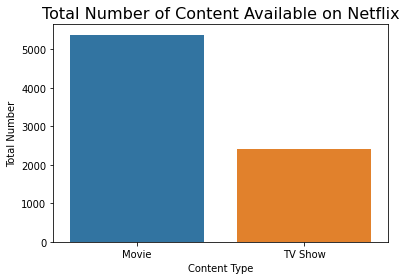

In [ ]:
fig = sns.countplot(data=nchill, x="type")
plt.title('Total Number of Content Available on Netflix', fontsize=16)
plt.ylabel('Total Number')
plt.xlabel('Content Type')

Text(0.5, 0, 'Content Rating')

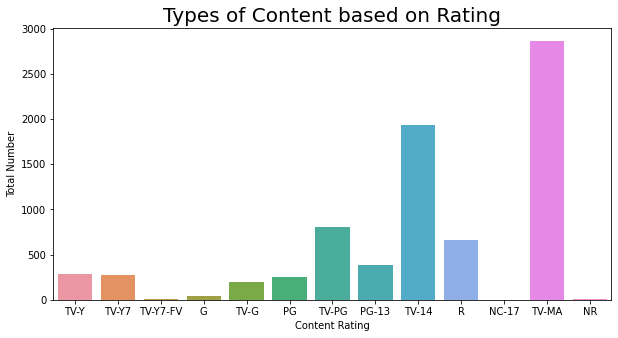

In [ ]:
order_rating = ['TV-Y', 'TV-Y7', 'TV-Y7-FV', 'G', 'TV-G', 'PG', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 
               'TV-MA', 'NR']
plt.figure(figsize=(10,5))
fig = sns.countplot(data=nchill, x="rating", order=order_rating)
plt.title('Types of Content based on Rating', fontsize=20)
fig.set_xticklabels(order_rating)
plt.ylabel('Total Number')
plt.xlabel('Content Rating')

In [ ]:
def group_by_rating(rating):
    if rating in ['TV-Y', 'TV-Y7', 'TV-Y7-FV', 'G', 'TV-G', 'PG', 'TV-PG']:
        new_ratin_group = 'under 12'
    elif rating in ['PG-13', 'TV-14']:
        new_ratin_group = '10-18 yrs'
    elif rating in ['R', 'NC-17', 'TV-MA']:
        new_ratin_group = 'Adults'
    else:
        new_ratin_group = 'Unrated'
    return new_ratin_group 
        

nchill['rating_grp'] = nchill.apply(lambda x: group_by_rating(x['rating']), axis=1)

order_rating = ['under 12', '10-18 yrs', 'Adults', 'Unrated']
fig = sns.countplot(data=nchill, x="rating_group", order=order_rating, hue = 'type')
plt.title('Rating of Content based on Content Type', fontsize=20)
fig.set_xticklabels(order_rating)
plt.ylabel('Total Number')
plt.xlabel('Age Groups')

ValueError: ignored

In [ ]:
#Now we are going to look into genres
nchill['listed_in'] = nchill['listed_in'].str.split(', ')
nchill['listed_in']

0       [International TV Shows, TV Dramas, TV Sci-Fi ...
1                          [Dramas, International Movies]
2                   [Horror Movies, International Movies]
3       [Action & Adventure, Independent Movies, Sci-F...
4                                                [Dramas]
                              ...                        
7782                       [Dramas, International Movies]
7783     [Dramas, International Movies, Music & Musicals]
7784    [Documentaries, International Movies, Music & ...
7785                 [International TV Shows, Reality TV]
7786                    [Documentaries, Music & Musicals]
Name: listed_in, Length: 7787, dtype: object

In [ ]:
#Understanding the maximum count of Genres
count_genre = [len(genre) for genre in nchill['listed_in']]
max(count_genre)

3

In [ ]:
#Creating new columns for categories from listed_in
nchill[['category1','category2', 'category3']] = pd.DataFrame(nchill.listed_in.tolist(), index= nchill.index)

In [ ]:
nchill_cat = nchill[['type', 'category1','category2', 'category3']] #Subseting the data based on columns
nchill_cat= pd.get_dummies(nchill_cat.set_index('type'), prefix='',prefix_sep='').stack().sum(level=[0,1]) #pd.groupby can also be used here
nchill_cat

type                             
Movie    Action & Adventure          721.0
         Anime Features               57.0
         Anime Series                  0.0
         British TV Shows              0.0
         Children & Family Movies    532.0
                                     ...  
TV Show  TV Sci-Fi & Fantasy          76.0
         TV Shows                     12.0
         TV Thrillers                 50.0
         Teen TV Shows                60.0
         Thrillers                     0.0
Length: 84, dtype: float64

Text(0, 0.5, 'Total Number')

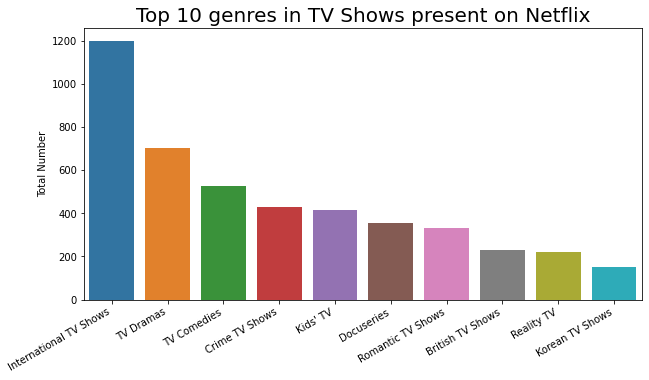

In [ ]:
plt.figure(figsize=(10,5))
fig = sns.barplot(x = nchill_cat['TV Show'].sort_values(ascending=False).head(10).index, 
                  y = nchill_cat['TV Show'].sort_values(ascending=False).head(10))
plt.title('Top 10 genres in TV Shows present on Netflix', fontsize=20)
plt.xticks(rotation=30, horizontalalignment="right")
plt.ylabel('Total Number')

Text(0, 0.5, 'Total Number')

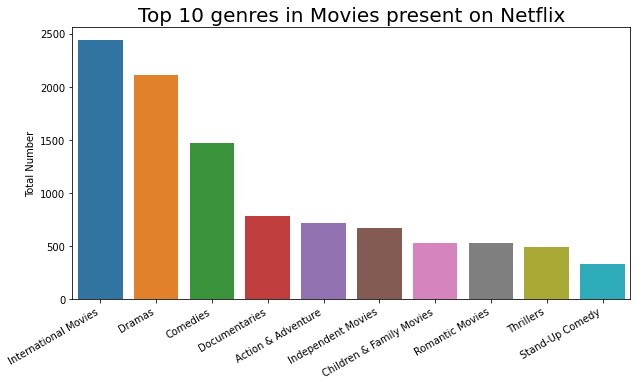

In [ ]:
nchill_cat['Movie'].sort_values(ascending=False)
plt.figure(figsize=(10,5))
fig = sns.barplot(x = nchill_cat['Movie'].sort_values(ascending=False).head(10).index, 
                  y = nchill_cat['Movie'].sort_values(ascending=False).head(10))
plt.title('Top 10 genres in Movies present on Netflix', fontsize=20)
plt.xticks(rotation=30, horizontalalignment="right")
plt.ylabel('Total Number')

In [ ]:
#Duration differs on Type column, for movies it is in minutes where as for tv shows it is wrt seasons 
nchill['duration'] = [int(duration[0]) for duration in nchill['duration'].str.split(' ')]
nchill['duration']

In [ ]:
plt.figure(figsize=(10,5))
fig = sns.barplot(x = nchill[nchill['type']=='TV Show']['duration'].value_counts().index, 
                  y = nchill[nchill['type']=='TV Show']['duration'].value_counts())
plt.title('Duration of TV Shows', fontsize=20)
plt.ylabel('Count')
plt.xlabel('Duration (seasons)')

In [ ]:
#We can also look into the Spread of duration with respect to movies on Netflix
nchill[nchill['type']=='Movie']['duration'].describe()

In [ ]:
#Let us analyse the countries which have highest amount of content wrt TV Shows
nchill[nchill['type']=='TV Show'].groupby(['country_fin'])['country_fin'].agg('count').nlargest(10)

In [ ]:
# We can get the count for both Movies as well as TV Shows and then check the Top countries contributing to the content
type_grp = nchill.groupby(['country_fin', 'type']) #Creating a group-by object
type_grp_cnt = type_grp['country_fin'].agg({'count'}) #Getting the count
type_grp_cnt = type_grp_cnt.reset_index() #Coercing it to a dataframe
type_grp_cnt.head()

In [ ]:
type_grp_cnt[type_grp_cnt['type'] == 'TV Show'].sort_values(by = 'count', ascending = False) 

In [ ]:
#Getting the top 5 countries by content contribution wrt Movies
sns.barplot(x = type_grp_cnt[type_grp_cnt['type'] == 'Movie'].sort_values(by = 'count', ascending = False)['country_fin'].head(5), 
            y = type_grp_cnt[type_grp_cnt['type'] == 'Movie'].sort_values(by = 'count', ascending = False)['count'].head(5))
plt.xticks(rotation=30, horizontalalignment="right")
plt.title("Top 5 countries with Movies on Netflix")
plt.xlabel('Countries')
plt.ylabel('counts')

In [ ]:
#Getting the top 5 countries by content contribution wrt TV Shows
sns.barplot(x = type_grp_cnt[type_grp_cnt['type'] == 'TV Show'].sort_values(by = 'count', ascending = False)['country_fin'].head(5), 
            y = type_grp_cnt[type_grp_cnt['type'] == 'TV Show'].sort_values(by = 'count', ascending = False)['count'].head(5))
plt.xticks(rotation=30, horizontalalignment="right")
plt.title(f'Top 5 countries with TV Shows on Netflix', fontsize=20)
plt.ylabel('Count')
plt.xlabel('Countries')

The analysis can further drill down to understand which type genres are produced more country wise.
Or Country vs Ratings can also be analysed.

## BOSTON HOUSING DATA

In [ ]:
import pandas as pd
housing = pd.read_csv('/content/drive/MyDrive/2_UPg/EDA/Boston_housing/housing.csv')

In [ ]:
housing.head()

In [ ]:
housing.info()

In [ ]:
housing.describe()

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
housing["median_income"].hist()

In [ ]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])
housing["income_cat"].value_counts()

In [ ]:
housing["income_cat"].hist()

For creating test train split we can leverage income_cat for creating a stratified sample.

In [ ]:
housing.plot(kind="scatter", x="longitude", y="latitude")

There's surely an overlap wrt data points, so let's set the alpha argument to 0.1 to give us areas which have density of data

In [ ]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

In [ ]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["population"]/100, label="population", figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()
# Here, s will set the radius of circles depending upon the pop/100 
# c will set the color for median house map with cmap "jet"

In [ ]:
import matplotlib.image as mpimg
california_img=mpimg.imread('/content/drive/MyDrive/2_UPg/EDA/Boston_housing/california.png')
ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                  s=housing['population']/100, label="Population",
                  c="median_house_value", cmap=plt.get_cmap("jet"),
                  colorbar=False, alpha=0.4)
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar(ticks=tick_values/prices.max())
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)
plt.show()

Seeing this we can build certain assumptions on how median house values are affected because of locations.